In [1]:
import pandas as pd
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [2]:
train_type = [i[1] for i in train.groupby('type')]

In [3]:
train_type[0]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93,0
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75,0
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12,0
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39,0
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12,0
...,...,...,...,...,...,...,...,...
427,1.32,37.49,0.7,17.10,1399.0,55.54,2.78,0
428,1.80,43.85,0.7,23.32,1908.0,61.20,3.06,0
429,2.79,56.99,0.7,36.17,2959.0,72.88,3.64,0
430,2.25,49.79,0.7,29.13,2383.0,66.48,3.32,0


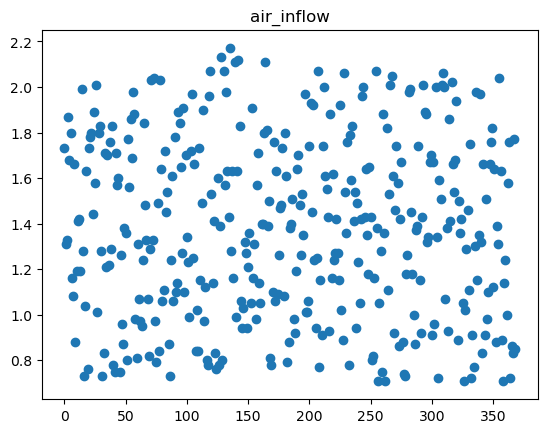

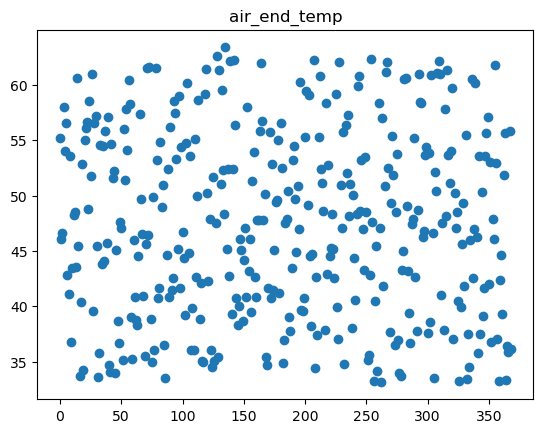

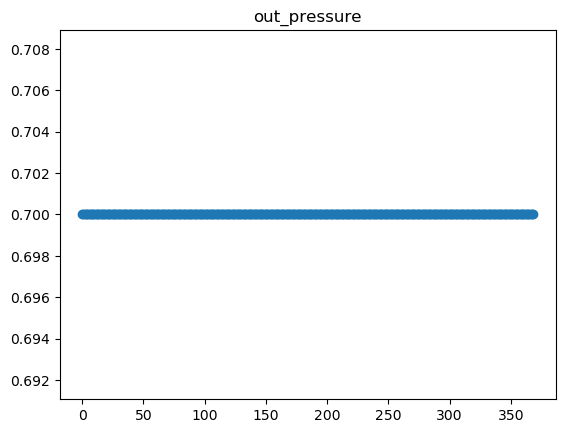

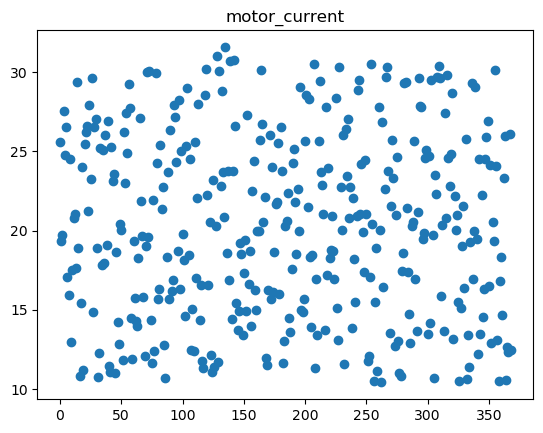

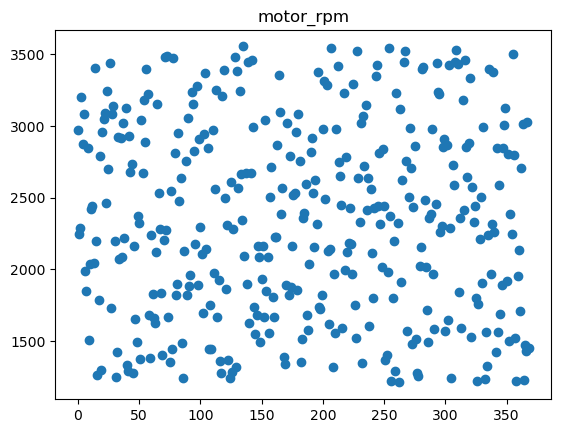

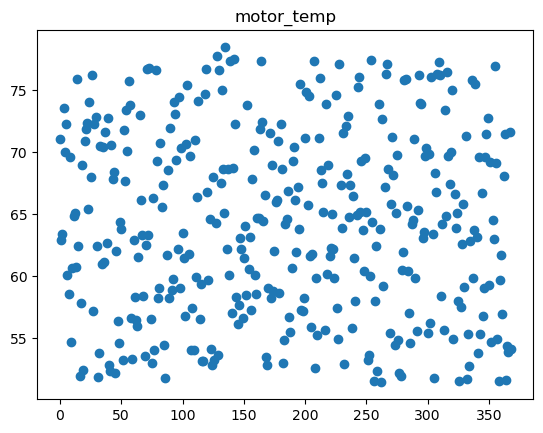

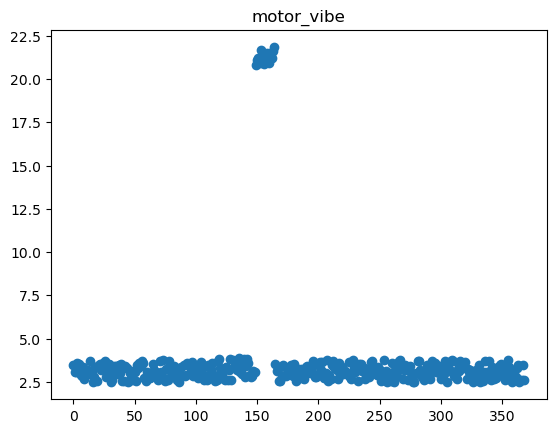

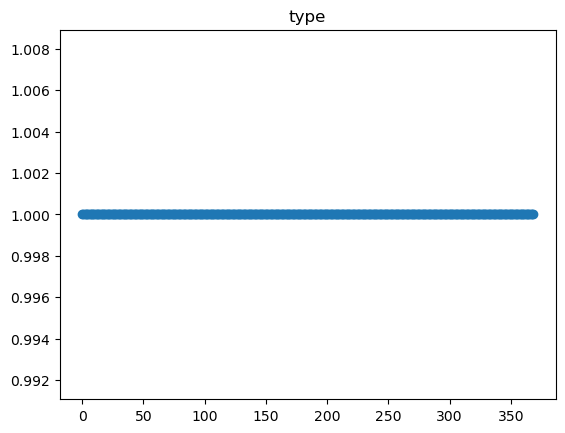

In [4]:
import matplotlib.pyplot as plt
type_ = 1
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train_type[type_])),train_type[type_][i])
    plt.show()

In [5]:
train_type[1] = train_type[1][(train_type[1]['motor_vibe'] < 3.8)]
train_type[1]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe,type
432,1.73,55.16,0.7,25.60,2973.0,71.03,3.45,1
433,1.31,46.05,0.7,19.32,2244.0,62.93,3.05,1
434,1.33,46.59,0.7,19.69,2287.0,63.41,3.07,1
435,1.87,58.00,0.7,27.56,3200.0,73.56,3.58,1
436,1.68,53.98,0.7,24.78,2878.0,69.98,3.40,1
...,...,...,...,...,...,...,...,...
796,0.72,33.33,0.7,10.56,1226.0,51.62,2.48,1
797,0.86,36.41,0.7,12.68,1473.0,54.37,2.62,1
798,0.83,35.88,0.7,12.31,1430.0,53.89,2.59,1
799,1.77,55.85,0.7,26.07,3028.0,71.64,3.48,1


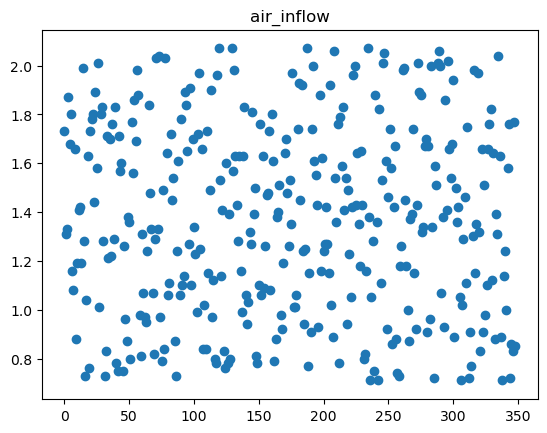

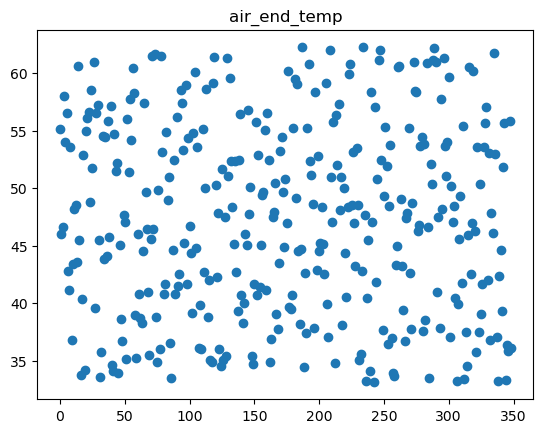

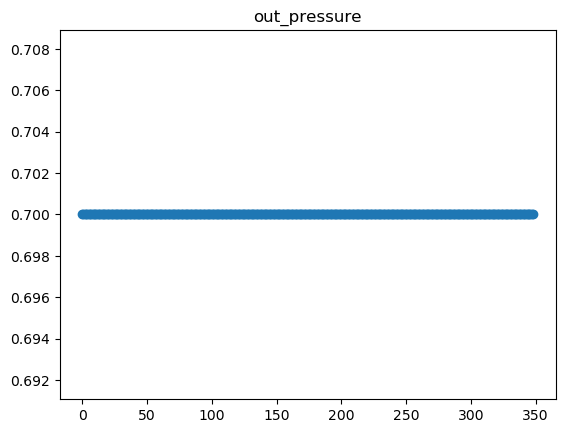

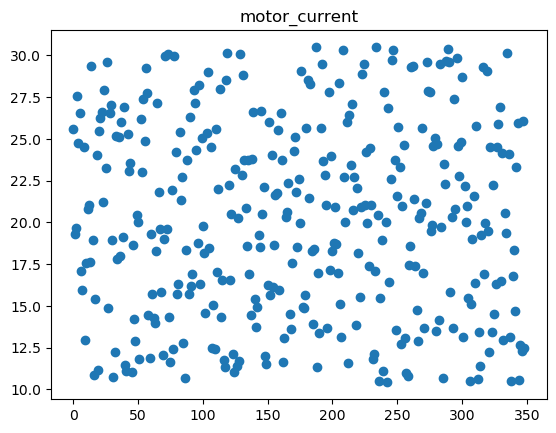

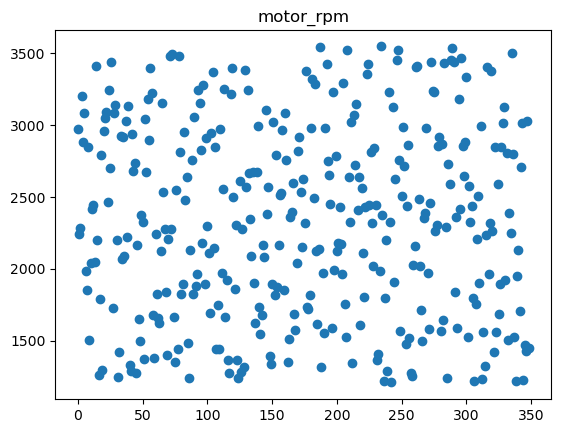

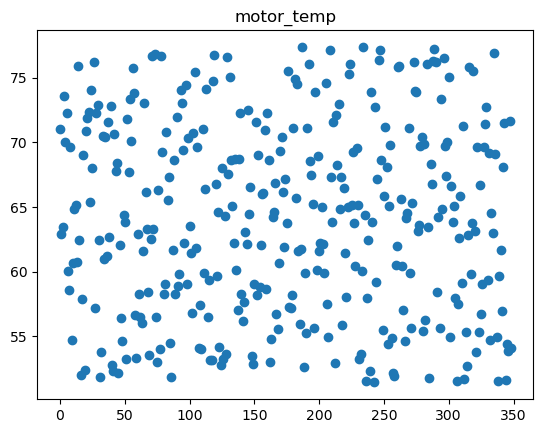

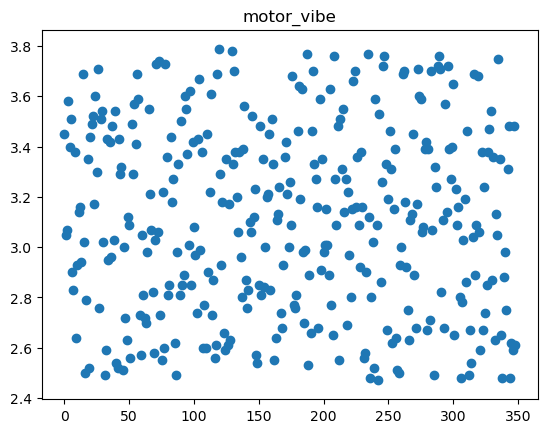

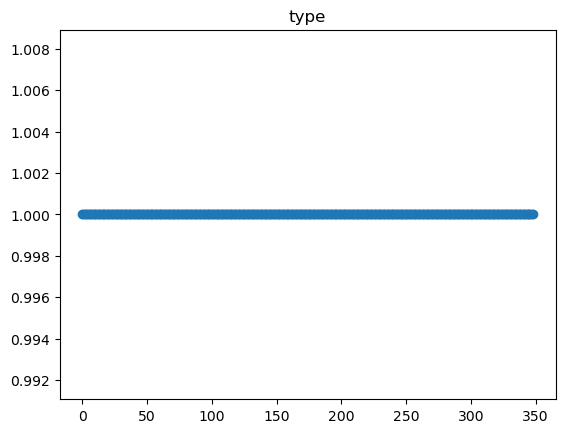

In [6]:
import matplotlib.pyplot as plt
type_ = 1
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train_type[type_])),train_type[type_][i])
    plt.show()

In [7]:
# import matplotlib.pyplot as plt
# type_ = 7
# for i in train.columns:
#     plt.title(i)
#     plt.scatter(range(len(train_type[type_])),train_type[type_][i])
#     plt.show()

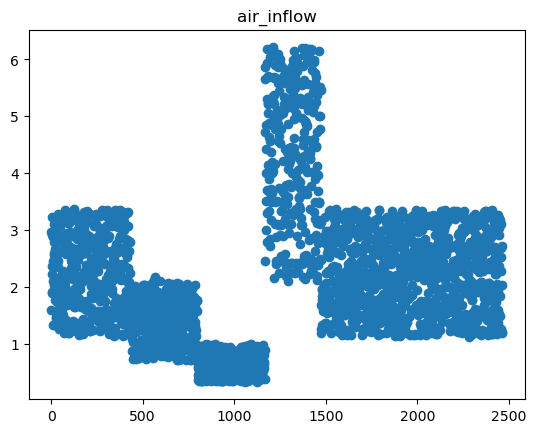

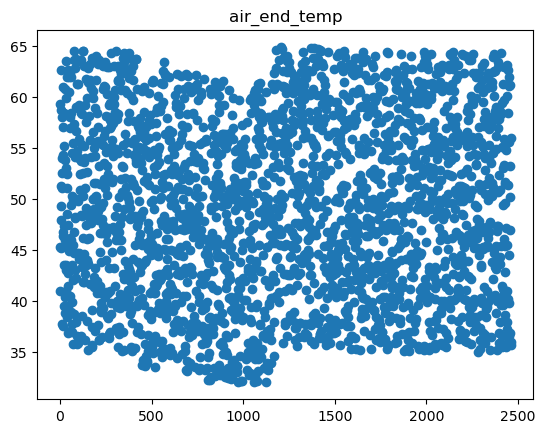

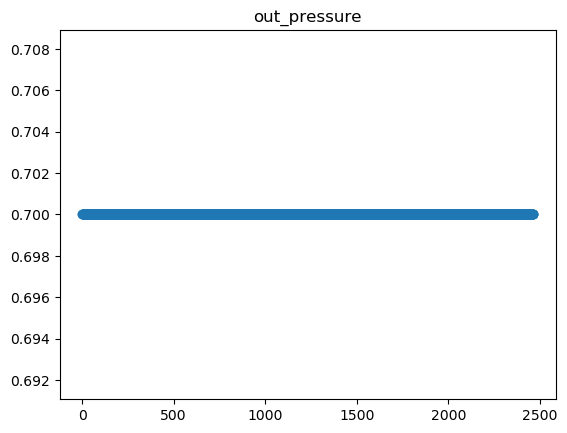

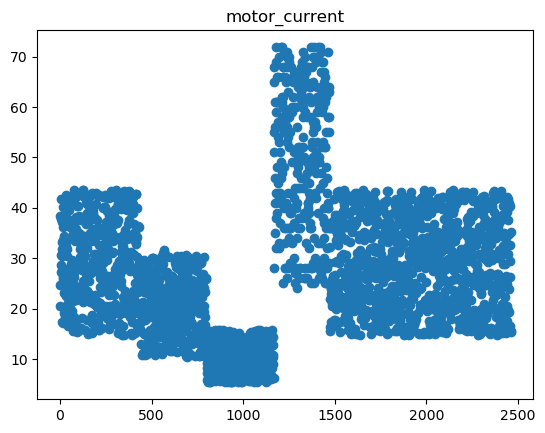

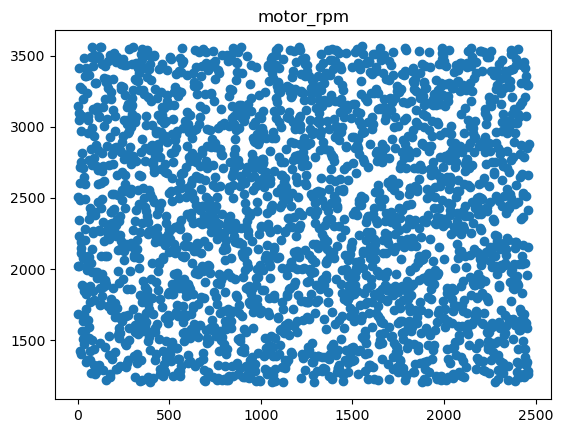

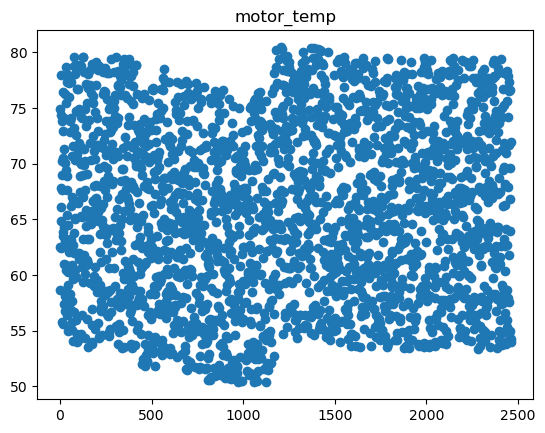

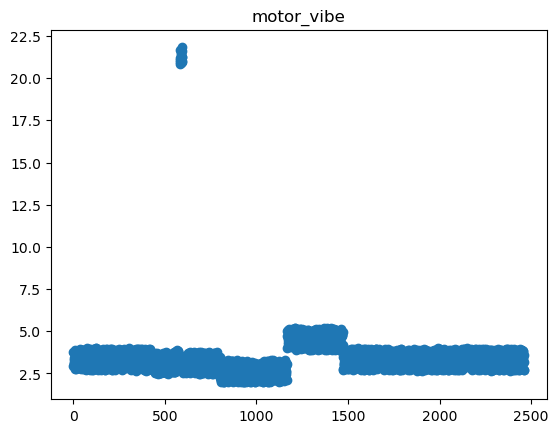

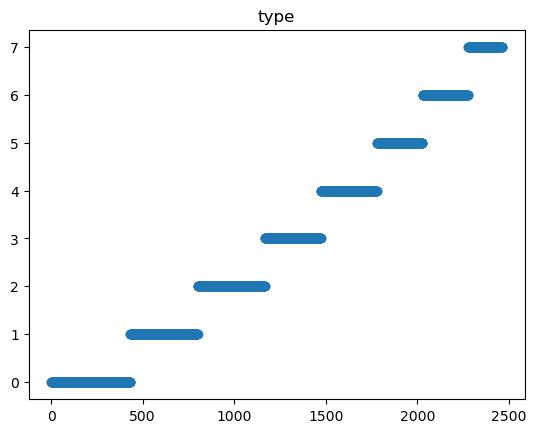

In [8]:
import matplotlib.pyplot as plt
for i in train.columns:
    plt.title(i)
    plt.scatter(range(len(train)),train[i])
    plt.show()

In [9]:
train = train[train['motor_vibe'] < 10]
train = train.reset_index(drop=True)

In [10]:
train.loc[:,train.columns[:-1]]

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,motor_vibe
0,1.59,41.00,0.7,20.53,1680.0,58.67,2.93
1,2.97,59.28,0.7,38.40,3142.0,74.91,3.75
2,1.91,45.29,0.7,24.73,2023.0,62.48,3.12
3,2.37,51.33,0.7,30.63,2506.0,67.84,3.39
4,1.90,45.21,0.7,24.65,2017.0,62.41,3.12
...,...,...,...,...,...,...,...
2442,2.28,50.20,0.7,29.53,2416.0,66.84,3.34
2443,2.04,46.94,0.7,26.34,2155.0,63.94,3.20
2444,1.19,35.74,0.7,15.39,1259.0,53.99,2.70
2445,1.21,36.00,0.7,15.64,1280.0,54.22,2.71


In [11]:
conc = pd.DataFrame()
for i in train_type:
    conc = pd.concat([conc,i])
train = conc.reset_index(drop=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
tar = pd.DataFrame(ohe.fit_transform(train[['type']]))

In [13]:
setting = 'motor_vibe'
tar = pd.DataFrame(ohe.fit_transform(train[['type']]))
target = pd.concat([train.loc[:,train.columns[:-1]],tar],axis=1)
label = target[setting]
target = target.drop(setting,axis=1)

In [14]:
target

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,0,1,2,3,4,5,6,7
0,1.59,41.00,0.7,20.53,1680.0,58.67,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.97,59.28,0.7,38.40,3142.0,74.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.91,45.29,0.7,24.73,2023.0,62.48,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.37,51.33,0.7,30.63,2506.0,67.84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.90,45.21,0.7,24.65,2017.0,62.41,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,2.28,50.20,0.7,29.53,2416.0,66.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2439,2.04,46.94,0.7,26.34,2155.0,63.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2440,1.19,35.74,0.7,15.39,1259.0,53.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2441,1.21,36.00,0.7,15.64,1280.0,54.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(target,label)

C:\ProgramData\anaconda3\envs\hi\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [16]:
tar = pd.DataFrame(ohe.fit_transform(test[['type']]))
target = pd.concat([test.loc[:,test.columns[:-1]],tar],axis=1)
label = target[setting]
target = target.drop(setting,axis=1)

In [17]:
target

,air_inflow,air_end_temp,out_pressure,motor_current,motor_rpm,motor_temp,0,1,2,3,4,5,6,7
0,2.51,53.28,0.7,32.54,2662.0,69.58,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.66,55.24,0.7,34.45,2819.0,71.32,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.72,42.74,0.7,22.23,1819.0,60.21,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.20,49.15,0.7,28.50,2332.0,65.91,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.06,47.28,0.7,26.67,2182.0,64.24,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7384,2.12,48.08,0.7,27.45,2246.0,64.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7385,1.48,39.63,0.7,19.19,1570.0,57.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7386,1.56,40.61,0.7,20.15,1649.0,58.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7387,1.59,40.99,0.7,20.52,1679.0,58.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
value = scaler.fit_transform(np.array(model.predict(target) - test[setting]).reshape(-1,1))

C:\ProgramData\anaconda3\envs\hi\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(-0.05, 0.18)

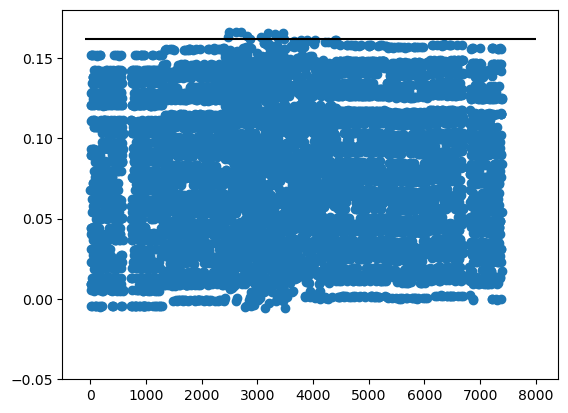

In [83]:
plt.scatter(range(len(value)),value)
plt.hlines(0.162,-100,8000,colors='black')
plt.ylim(-0.05,0.18)


In [84]:
tp = pd.DataFrame(value)
tp_ = list(tp[0])
temp = [0 for _ in range(len(test))]
for i in range(len(test)):
    if tp_[i] > 0.162 or tp_[i] < -0.05:
        temp[i] = 1

In [85]:
for i in test[test['out_pressure'] != 0.7].index:
    temp[i] = 1

In [86]:
sum(temp)

349

In [69]:
sub = pd.read_csv('./answer_sample.csv')
sub['label'] = temp
sub.set_index('type')

,label
type,
0,0
0,0
0,0
0,0
0,0
...,...
7,0
7,0
7,0


In [24]:
sub.to_csv(f'./submission_{setting}.csv')